# Z-Inspection Performance & Test Results

Bu notebook, **Lighthouse Performans Testi** ve **Jest Fonksiyonel Test** sonuçlarını görselleştirmek için hazırlanmıştır.
Grafikleri görmek için aşağıdaki hücreleri sırasıyla çalıştırın.

In [ ]:
# Gerekli kütüphanenin kurulumu
%pip install matplotlib

## 1. Jest Fonksiyonel Test Sonuçları (Backend)
Mantıksal testlerin başarı durumunu gösteren grafik.

C:\Users\pelin\AppData\Local\Temp\ipykernel_10148\2394310520.py:29: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


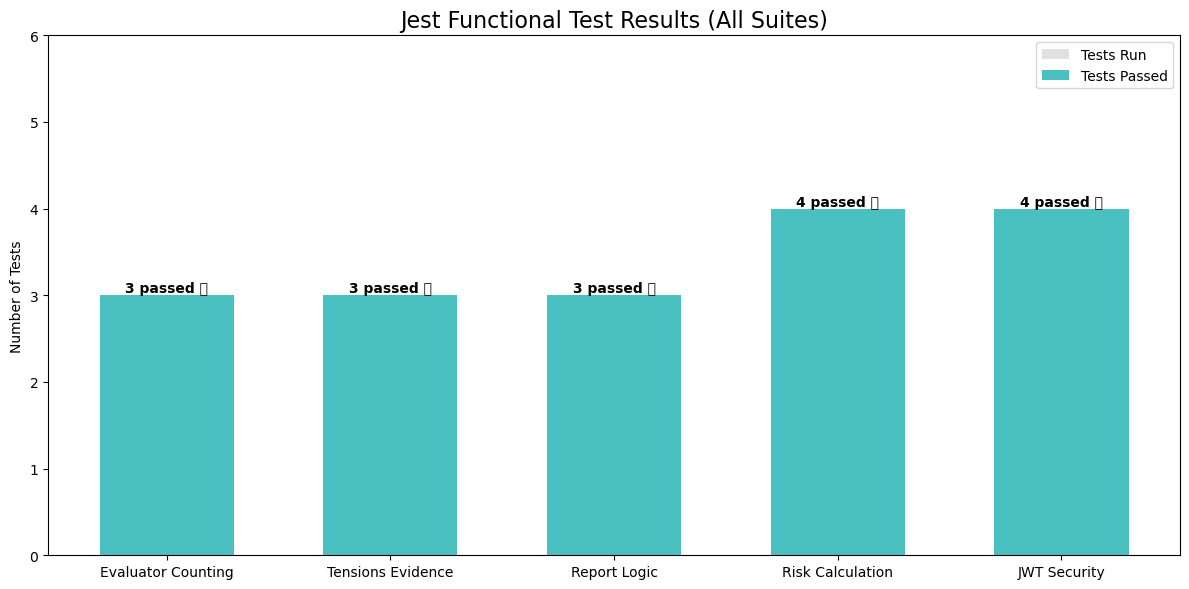

In [6]:
import matplotlib.pyplot as plt

# Data
suites = ['Evaluator Counting', 'Tensions Evidence', 'Report Logic', 'Risk Calculation', 'JWT Security']
tests_run = [3, 3, 3, 4, 4]
tests_passed = [3, 3, 3, 4, 4]

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')

# Create bars
bars_run = ax.bar(suites, tests_run, label='Tests Run', color='#e0e0e0', width=0.6)
bars_passed = ax.bar(suites, tests_passed, label='Tests Passed', color='#4bc0c0', width=0.6)

# Labels and styling
ax.set_ylabel('Number of Tests')
ax.set_title('Jest Functional Test Results (All Suites)', fontsize=16)
ax.legend()
ax.set_ylim(0, 6)

# Add data labels
for bar in bars_passed:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)} passed ✅',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Lighthouse Performans Skorları
Performans, Erişilebilirlik ve diğer kategorilerin skor kartları.

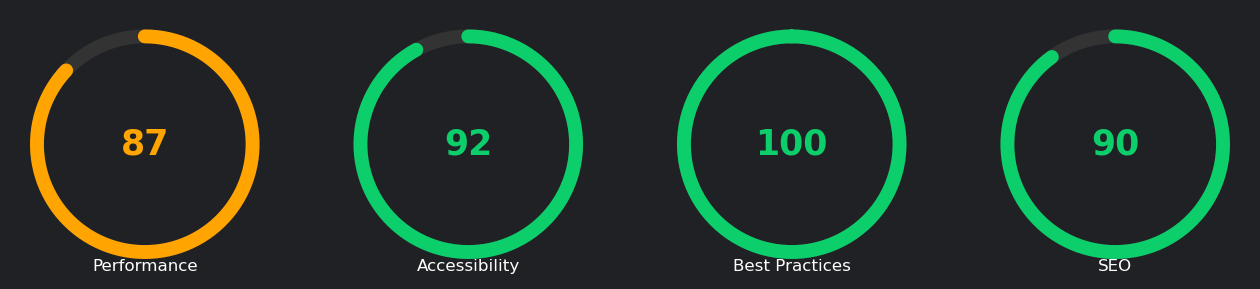

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Lighthouse Data
labels = ['Performance', 'Accessibility', 'Best Practices', 'SEO']
scores = [87, 92, 100, 90] # Örnek gerçek veriler

def draw_gauge(ax, score, label):
    # Colors
    if score >= 90:
        color = '#0cce6b' # Green
    elif score >= 50:
        color = '#ffa400' # Orange
    else:
        color = '#ff4e42' # Red
    
    # Draw background circle
    circle_bg = plt.Circle((0.5, 0.5), 0.4, color='#333333', fill=False, linewidth=10)
    ax.add_artist(circle_bg)
    
    # Draw Score Arc
    theta = np.linspace(0, 2*np.pi * (score/100), 100)
    x = 0.5 + 0.4 * np.sin(theta)
    y = 0.5 + 0.4 * np.cos(theta)
    ax.plot(x, y, color=color, linewidth=10, solid_capstyle='round')
    
    # Text
    ax.text(0.5, 0.5, str(score), horizontalalignment='center', 
            verticalalignment='center', fontsize=25, fontweight='bold', color=color)
    ax.text(0.5, 0.05, label, horizontalalignment='center', 
            verticalalignment='center', fontsize=12, color='white')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    ax.set_aspect('equal')

# Create Subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.patch.set_facecolor('#202124') # Dark background match

for ax, score, label in zip(axes, scores, labels):
    draw_gauge(ax, score, label)

plt.show()

## 3. Detaylı Metrik Analizi (Ölçülen vs Hedef)
Rapordaki zaman tabanlı metriklerin (TTI, FCP, Speed Index) hedefle karşılaştırılması.

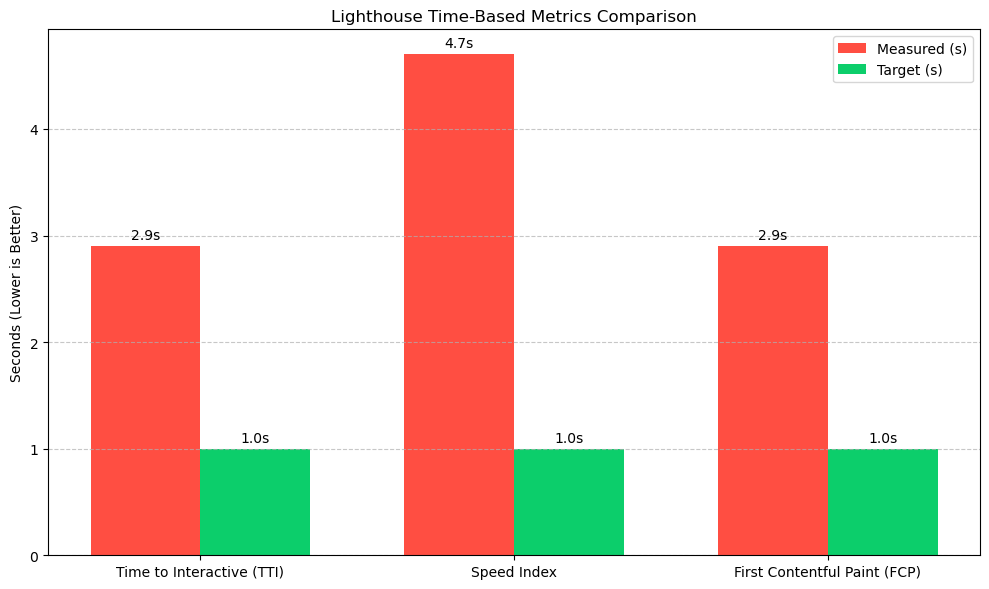

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the Key Metrics Table
metrics = ['Time to Interactive (TTI)', 'Speed Index', 'First Contentful Paint (FCP)']
measured = [2.9, 4.7, 2.9]  # Seconds
targets = [1.0, 1.0, 1.0]   # Seconds (Target)

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

rects1 = ax.bar(x - width/2, measured, width, label='Measured (s)', color='#ff4e42')
rects2 = ax.bar(x + width/2, targets, width, label='Target (s)', color='#0cce6b')

ax.set_ylabel('Seconds (Lower is Better)')
ax.set_title('Lighthouse Time-Based Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}s'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()